# Project: Analyzing Macbeth

## Introduction
Now we're going to do some rudimentary analysis of Shakespeare's classic play: Macbeth! You will get practice working with lists and dictionaries, conditionals, visualizing data, and thinking analytically about data.

## Objectives
You will be able to:
* Apply string methods to make changes to a string
* Use a `for` loop to iterate over a collection
* Assign values in a dictionary

## Getting the Data
Here we start by importing a Python package called `requests`. We'll use it to pull the transcript of Macbeth from the [Project Gutenberg](https://www.gutenberg.org/) website. We'll also preview a few details about what is now stored in the variable `macbeth`. As you can see, it's a string with 120,253 characters - the first 500 of which are printed below. 

In [38]:
import requests
macbeth = requests.get('http://www.gutenberg.org/cache/epub/2264/pg2264.txt').text

print(type(macbeth))
print(len(macbeth))
print(macbeth[16648:20000])

<class 'str'>
120253
The Tragedie of Macbeth

Actus Primus. Scoena Prima.

Thunder and Lightning. Enter three Witches.

  1. When shall we three meet againe?
In Thunder, Lightning, or in Raine?
  2. When the Hurley-burley's done,
When the Battaile's lost, and wonne

   3. That will be ere the set of Sunne

   1. Where the place?
  2. Vpon the Heath

   3. There to meet with Macbeth

   1. I come, Gray-Malkin

   All. Padock calls anon: faire is foule, and foule is faire,
Houer through the fogge and filthie ayre.

Exeunt.


Scena Secunda.

Alarum within. Enter King, Malcome, Donalbaine, Lenox, with
attendants, meeting a bleeding Captaine.

  King. What bloody man is that? he can report,
As seemeth by his plight, of the Reuolt
The newest state

   Mal. This is the Serieant,
Who like a good and hardie Souldier fought
'Gainst my Captiuitie: Haile braue friend;
Say to the King, the knowledge of the Broyle,
As thou didst leaue it

   Cap. Doubtfull it stood,
As two spent Swimmers, that doe c

## Your Task

Your task is to create a bar graph of the 25 most common words in Shakespeare's Macbeth.  


A common Python programming pattern to count objects, produce histograms, or update statistics is to make calls to a dictionary as you iterate through a list. For example, given a list of words, you can create a dictionary to store counts and then iterate through the list of words, checking how many times each word has appeared using your dictionary, and updating the dictionary count now that you've seen that word again. The `.get()` dictionary method is very useful in doing this. Read the docstring for the `.get()` method and use it along with the pseudocode below to create a bar graph of the 25 most common words from the transcript of Macbeth which has been loaded into the variable 'macbeth'. Be sure to include a title and appropriate labels for your graph.

To get the 25 *most common* words, you will have to sort your counts. If you are not super sure how to do this, checkout out the [Sorting HOW TO](https://docs.python.org/3/howto/sorting.html) Python documentation. Part of being a data scientist is figuring out how to do tasks that you may not have done before. Remember, in these situations, Google is your friend!

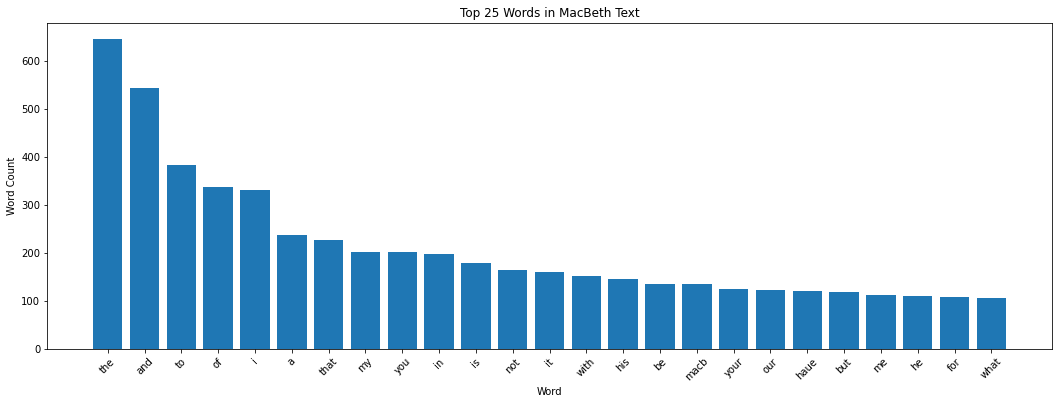

In [101]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

char_start = 16648 #start of actual macbeth story text

#characters to remove from string, not words
bad_chars = [",",":",".","(",")","!",";","{","}","?","1","2","3","4","5","6","7","8","9","0",'"'] 

#splitlines() removes line feed characters
lines = macbeth[char_start:].splitlines()

#function will loop through and remove bad characters list
def strip_characters(string, bad_chars) :
    for char in bad_chars :
        string = string.replace(char, '')       
    return string

lines_clean = list(map(lambda line: strip_characters(line, bad_chars), lines))

#function takes a line and returns words
def identify_words(string) :
    words = []
    words = string.split(" ")
    while "" in words: words.remove("")
    words = [word.lower() for word in words] #remove caps to de-dup words
    return words

unique_words = {}

#loop though all lines to build dictionary of unique words and counts
for line in lines_clean :
    word_list = []
    word_list = identify_words(line)
    for word in word_list :
        unique_words[word] = unique_words.get(word,0) + 1

#sort and take top 25 words from final list
unique_words_sorted = sorted(unique_words.items(), key=lambda x: x[1], reverse=True)
unique_words_sorted_top25 = unique_words_sorted[:25]

#create horizontal bar chart
x = list(map(lambda i: i[0], unique_words_sorted_top25))
y = list(map(lambda i: i[1], unique_words_sorted_top25))
plt.figure(figsize=(18,6))
plt.bar(x, y)
plt.title('Top 25 Words in MacBeth Text')
plt.xticks(rotation=45)
plt.xlabel('Word')
plt.ylabel("Word Count")
plt.show()


## Level Up (Optional)
This project should take you about an hour and a half to complete. If you're done much more quickly than that and are not behind in the course, feel free to deepen your knowledge by completing any or all of the following tasks until you run out of time:
* Create a list of top characters by mentions of their names 
* Split the text by which character is talking
* Create subgraphs of the most common words by character
* Reduce the string to the text of the play itself. (Remove any initial notes, forward, introduction, appendix, etc.)
* Come up with some other fun analyses of the text!

## Summary
Congratulations! You've got some extra practice combining various data types into useful programming patterns and done an initial analysis of a classic text!